In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.titlesize'] = 28
plt.rcParams['legend.fontsize'] = 15

In [3]:
def plot_heatmaps(df, color_scale="Reds", measure_name=None):
    
    matrix = df.to_numpy()
    labels_x = df.columns.to_list()
    labels_y = df.index.to_list()

    fig, ax = plt.subplots(figsize=(10,10))
    
    if measure_name == "symm-cultsim":

        matrix = np.tril(matrix, k=1)
        matrix[np.triu_indices(n=matrix.shape[0], k=1, m=matrix.shape[1])] = -2

    im = ax.imshow(matrix, vmin=-1, vmax=1, cmap=color_scale)

    ax.figure.colorbar(im, fraction=0.043, pad=0.04, label="cosine similarity")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(labels_x)))
    ax.set_yticks(np.arange(len(labels_y)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(labels_x)
    ax.set_yticklabels(labels_y)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(labels_x)):
        for j in range(len(labels_y)):
            text = ax.text(j, i, round(matrix[i, j],2),
                           ha="center", va="center", color="w")

    fig.tight_layout()
    plt.savefig("figs/heatmap-"+measure_name+"-"+color_scale+".eps", bbox_inches="tight", format="eps")
    plt.show()


## Symmetric Cultural Similarity

In [4]:
symm_cultsim_data = pd.read_csv("data/cultural-similarity-symmetric.csv", index_col=0)
symm_cultsim_data

,Argentina,Australia,Brazil,Chile,France,Great Britain,Indonesia,Japan,Malaysia,Mexico,Russia,Singapore,South Korea,Spain,Turkey,United States
interests_from,,,,,,,,,,,,,,,,
Argentina,1.000000,-0.114336,0.176917,0.393919,-0.061345,-0.169153,-0.199208,-0.224372,-0.289974,0.272351,-0.080554,-0.209667,-0.201423,0.163592,-0.098683,-0.125806
Australia,-0.114336,1.000000,-0.183166,-0.216939,-0.181529,0.327279,-0.421242,-0.369408,0.180009,-0.192586,-0.487930,0.237499,-0.242149,-0.213544,-0.277765,0.450269
Brazil,0.176917,-0.183166,1.000000,0.121966,-0.009615,-0.091450,0.012284,0.040390,-0.278933,-0.023835,0.102400,-0.259892,-0.087316,0.072308,-0.031723,-0.192538
Chile,0.393919,-0.216939,0.121966,1.000000,-0.036575,-0.142708,-0.129304,-0.085777,-0.327508,0.347842,-0.015013,-0.255363,-0.205035,0.194459,-0.078146,-0.142413
France,-0.061345,-0.181529,-0.009615,-0.036575,1.000000,-0.016455,0.029158,0.097488,-0.291440,-0.100300,0.244665,-0.254725,-0.120866,0.232377,0.136341,-0.142481
Great Britain,-0.169153,0.327279,-0.091450,-0.142708,-0.016455,1.000000,-0.233838,-0.197736,-0.068667,-0.205507,-0.160122,0.000585,-0.152622,-0.037025,-0.167326,0.238016
Indonesia,-0.199208,-0.421242,0.012284,-0.129304,0.029158,-0.233838,1.000000,0.364093,-0.028780,-0.159263,0.538889,-0.234401,0.160825,-0.051447,0.204892,-0.314428
Japan,-0.224372,-0.369408,0.040390,-0.085777,0.097488,-0.197736,0.364093,1.000000,-0.268229,-0.173330,0.475692,-0.126197,0.215366,-0.006820,0.205870,-0.299365
Malaysia,-0.289974,0.180009,-0.278933,-0.327508,-0.291440,-0.068667,-0.028780,-0.268229,1.000000,-0.206967,-0.440619,0.510222,0.018685,-0.348761,-0.217555,0.036495


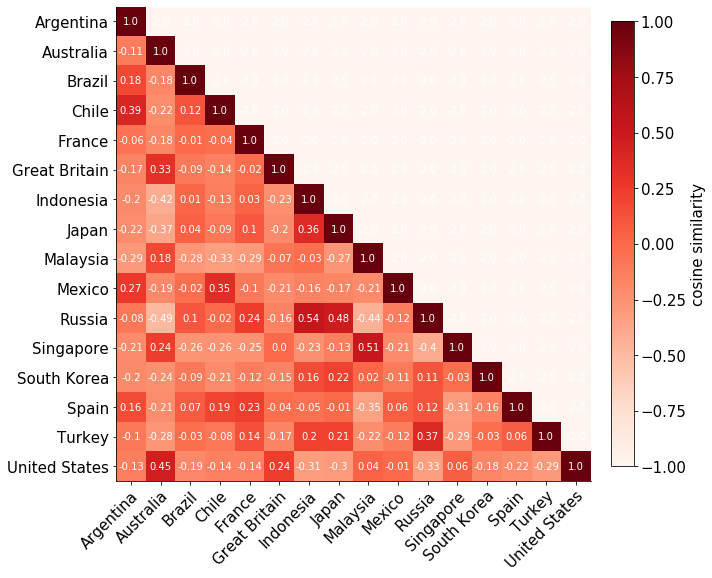

In [5]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True
    
plot_heatmaps(df=symm_cultsim_data, color_scale="Reds", measure_name="symm-cultsim") 
#color_scale = "Reds" #RdBu #bwr

## Asymmetric Cultural Similarity

In [6]:
asym_cultsim_data = pd.read_csv("data/cultural-similarity-nonsymmetric.csv", index_col=0)
asym_cultsim_data

,Argentina,Australia,Brazil,Chile,France,Great Britain,Indonesia,Japan,Malaysia,Mexico,Russia,Singapore,South Korea,Spain,Turkey,United States
interests_from,,,,,,,,,,,,,,,,
Argentina,1.000000,0.318567,0.107796,0.466730,-0.410868,-0.207280,-0.677962,-0.815936,-0.263883,0.344139,-0.694557,0.145924,-0.524286,0.035432,-0.724250,-0.030646
Australia,-0.255348,1.000000,-0.508155,-0.408968,-0.231631,0.279978,-0.747323,-0.501121,0.190184,-0.568518,-0.631861,0.369168,-0.434273,-0.322293,-0.851730,0.629218
Brazil,0.217246,0.202120,1.000000,0.117010,-0.523958,-0.041635,-0.493768,-0.648151,0.153331,-0.131074,-0.667598,0.013580,-0.321865,-0.074772,-0.714663,-0.078814
Chile,0.409019,0.099224,0.027488,1.000000,-0.576472,-0.269875,-0.589764,-0.512627,0.003410,0.514436,-0.681028,0.090223,-0.491062,0.066057,-0.769621,0.118722
France,-0.219271,0.346578,-0.573227,-0.298198,1.000000,0.118826,-0.493732,-0.439505,0.133435,-0.118451,-0.622886,0.129284,-0.396102,0.049921,-0.307114,0.301769
Great Britain,-0.366881,0.597763,-0.484574,-0.371741,-0.325941,1.000000,-0.671900,-0.546641,0.135017,-0.579594,-0.629021,0.357294,-0.350316,-0.192754,-0.758729,0.507604
Indonesia,-0.317599,0.340407,-0.330441,-0.327292,-0.472113,-0.135466,1.000000,-0.444311,0.537021,-0.308937,-0.531329,0.187354,-0.188713,-0.484058,-0.482021,0.100554
Japan,-0.517957,0.279089,-0.252696,-0.297352,-0.423019,-0.180318,-0.293909,1.000000,0.360119,-0.238884,-0.505290,0.555772,0.134619,-0.413593,-0.328614,-0.018032
Malaysia,-0.828872,0.408905,-0.760682,-0.619157,-0.627630,-0.684270,-0.262423,-0.881483,1.000000,-0.721838,-0.765957,0.715415,-0.337267,-0.861775,-0.855060,0.026759


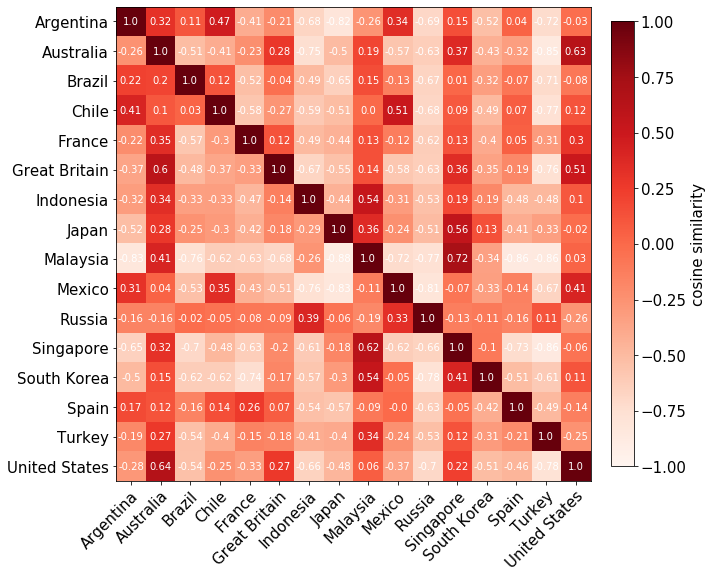

In [7]:
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.bottom'] = True

plot_heatmaps(df=asym_cultsim_data, color_scale="Reds", measure_name="asym-cultsim") 
#color_scale = "Reds" #RdBu #bwr

## Cultural Maps

In [8]:
locations_marker_plot_cs = {'Argentina': 'o', 'Australia': 'v', 'Brazil': 'd', 'Chile': 'o', 
                         'France': '*', 'Great Britain': 'v', 'Indonesia': 'd', 'Japan': 'd', 
                         'Malaysia': 's', 'Mexico': 'o', 'Russia': 'd', 'Singapore': 'X', 
                            'South Korea': '^', 'Spain': '*', 'Turkey': 'd', 'United States': 'v'}
           
locations_color_plot_cs = {'Argentina': 'c', 'Australia': 'b', 'Brazil': 'm', 'Chile': 'c', 
                         'France': 'y', 'Great Britain': 'b', 'Indonesia': 'm', 'Japan': 'm', 
                         'Malaysia': 'r', 'Mexico': 'c', 'Russia': 'm', 'Singapore': 'g', 
                           'South Korea': 'orange', 'Spain': 'y', 'Turkey': 'm', 'United States': 'b'}

locations_label_plot_cs = {'Argentina': '6', 'Australia': '0', 'Brazil': '4', 'Chile': '6', 
                         'France': '1', 'Great Britain': '0', 'Indonesia': '4', 'Japan': '4', 
                         'Malaysia': '5', 'Mexico': '6', 'Russia': '4', 'Singapore': '3', 
                           'South Korea': '2', 'Spain': '1', 'Turkey': '4', 'United States': '0'}

In [9]:
locations_marker_plot = {'Argentina': 'o', 'Australia': 'v', 'Brazil': 'o', 'Chile': 'o', 
                         'France': '*', 'Great Britain': 'v', 'Indonesia': 'd', 'Japan': '^', 
                         'Malaysia': 'X', 'Mexico': 'o', 'Russia': 's', 'Singapore': 'X', 
                         'South Korea': '^', 'Spain': '*', 'Turkey': 'd', 'United States': 'v'}
           
locations_color_plot = {'Argentina': 'c', 'Australia': 'b', 'Brazil': 'c', 'Chile': 'c', 
                         'France': 'y', 'Great Britain': 'b', 'Indonesia': 'm', 'Japan': 'orange', 
                         'Malaysia': 'g', 'Mexico': 'c', 'Russia': 'r', 'Singapore': 'g', 
                        'South Korea': 'orange', 'Spain': 'y', 'Turkey': 'm', 'United States': 'b'}

locations_label_plot = {'Argentina': 'Latin America', 'Australia': 'English Speaking', 'Brazil': 'Latin America', 'Chile': 'Latin America', 
                         'France': 'Catholic Europe', 'Great Britain': 'English Speaking', 'Indonesia': 'Islamic', 'Japan': 'Confucian', 
                         'Malaysia': 'South Asia', 'Mexico': 'Latin America', 'Russia': 'Orthodox', 'Singapore': 'South Asia', 
                        'South Korea': 'Confucian', 'Spain': 'Catholic Europe', 'Turkey': 'Islamic', 'United States': 'English Speaking'}

In [10]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

## PCA

In [11]:
symm_cultsim_pca_data = pd.read_csv("data/cultural-similarity-pca.csv", index_col=0)

symm_cultsim_pca_data

,PC1,PC2
Country,,
Argentina,-6.086689,7.221150
Australia,13.921626,13.101147
Brazil,-6.777135,1.515985
Chile,-6.391673,5.112751
France,-5.877565,-0.326726
Great Britain,3.352046,6.331081
Indonesia,-4.223348,-8.516785
Japan,-5.898715,-7.054236
Malaysia,26.007803,-12.028552


In [12]:
symm_cultsim_pca_data["marker"] = locations_marker_plot_cs.values()
symm_cultsim_pca_data["color"] = locations_color_plot_cs.values()
symm_cultsim_pca_data["label"] = locations_label_plot_cs.values()
symm_cultsim_pca_data

,PC1,PC2,marker,color,label
Country,,,,,
Argentina,-6.086689,7.221150,o,c,6
Australia,13.921626,13.101147,v,b,0
Brazil,-6.777135,1.515985,d,m,4
Chile,-6.391673,5.112751,o,c,6
France,-5.877565,-0.326726,*,y,1
Great Britain,3.352046,6.331081,v,b,0
Indonesia,-4.223348,-8.516785,d,m,4
Japan,-5.898715,-7.054236,d,m,4
Malaysia,26.007803,-12.028552,s,r,5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

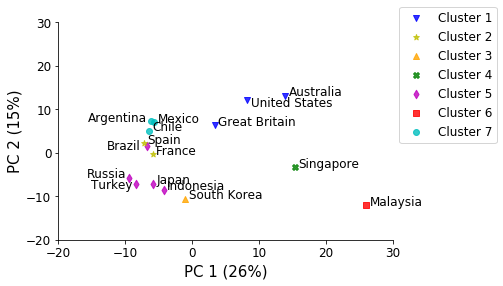

In [13]:
labels = symm_cultsim_pca_data.index.to_list()

for i, label in enumerate(labels):
    plt.scatter(symm_cultsim_pca_data.iloc[i,0], symm_cultsim_pca_data.iloc[i,1], 
                alpha=0.8, 
                marker=symm_cultsim_pca_data["marker"].iloc[i], 
                color=symm_cultsim_pca_data["color"].iloc[i], 
                label=symm_cultsim_pca_data["label"].iloc[i])

for i, label in enumerate(labels):   
    if label == "Argentina":
        plt.annotate(label, (symm_cultsim_pca_data.iloc[i,0]-9.5, symm_cultsim_pca_data.iloc[i,1]), fontsize=12)
        
    elif label == "Brazil":
        plt.annotate(label, (symm_cultsim_pca_data.iloc[i,0]-6, symm_cultsim_pca_data.iloc[i,1]-0.8), fontsize=12)
        
    elif label == "Turkey":
        plt.annotate(label, (symm_cultsim_pca_data.iloc[i,0]-6.8, symm_cultsim_pca_data.iloc[i,1]-1), fontsize=12)
        
    elif label == "Russia":
        plt.annotate(label, (symm_cultsim_pca_data.iloc[i,0]-6.4, symm_cultsim_pca_data.iloc[i,1]), fontsize=12)
        
    elif label == "United States":
        plt.annotate(label, (symm_cultsim_pca_data.iloc[i,0]+0.5, symm_cultsim_pca_data.iloc[i,1]-1.5), fontsize=12)
        
    else:
        plt.annotate(label, (symm_cultsim_pca_data.iloc[i,0]+0.5, symm_cultsim_pca_data.iloc[i,1]), fontsize=12)

hs, ls = plt.gca().get_legend_handles_labels()
ls = ["Cluster " + str(int(l)+1) for l in ls]
by_label = dict(sorted(dict(zip(ls, hs)).items(), key=lambda kv:kv[0]))
plt.legend(by_label.values(), by_label.keys(), fontsize=12, bbox_to_anchor=(1, 1.1), loc='upper left')

plt.xlabel("PC 1 (26%)")
plt.ylabel("PC 2 (15%)")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim((-20,30))
plt.ylim((-20,30))

plt.savefig("figs/pca-symm-cultsim.eps", bbox_inches='tight', format="eps")

plt.show()

## WVS Cultural Map 2020

In [14]:
wvs_data = pd.read_csv("data/wvs-wave7-2020.csv", index_col=0)
wvs_data

,S-SEV,T-SV
Country,,
Argentina,0.2276,-0.3849
Australia,2.2681,0.6354
Brazil,-0.0503,-0.3121
Chile,-0.0915,0.2214
France,1.4099,0.5362
Great Britain,2.3458,0.4881
Indonesia,-0.7675,-1.2452
Japan,1.2921,1.6625
Malaysia,-0.3557,0.0483


In [15]:
wvs_data["marker"] = locations_marker_plot.values()
wvs_data["color"] = locations_color_plot.values()
wvs_data["label"] = locations_label_plot.values()
wvs_data

,S-SEV,T-SV,marker,color,label
Country,,,,,
Argentina,0.2276,-0.3849,o,c,Latin America
Australia,2.2681,0.6354,v,b,English Speaking
Brazil,-0.0503,-0.3121,o,c,Latin America
Chile,-0.0915,0.2214,o,c,Latin America
France,1.4099,0.5362,*,y,Catholic Europe
Great Britain,2.3458,0.4881,v,b,English Speaking
Indonesia,-0.7675,-1.2452,d,m,Islamic
Japan,1.2921,1.6625,^,orange,Confucian
Malaysia,-0.3557,0.0483,X,g,South Asia


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

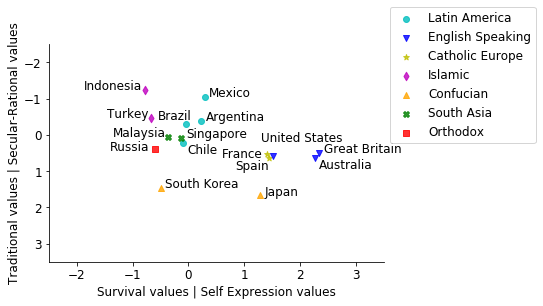

In [16]:
labels = wvs_data.index.to_list()

for i, label in enumerate(labels):
    plt.scatter(wvs_data.iloc[i,0], wvs_data.iloc[i,1], 
                alpha=0.8, 
                marker=wvs_data["marker"].iloc[i], 
                color=wvs_data["color"].iloc[i], 
                label=wvs_data["label"].iloc[i])

for i, label in enumerate(labels):    
    
    if label == "Indonesia":
        plt.annotate(label, (wvs_data.iloc[i,0]-1.1, wvs_data.iloc[i,1]), fontsize=12)
        
    elif label == "Turkey":
        plt.annotate(label, (wvs_data.iloc[i,0]-0.8, wvs_data.iloc[i,1]), fontsize=12)
        
    elif label == "Malaysia":
        plt.annotate(label, (wvs_data.iloc[i,0]-1, wvs_data.iloc[i,1]), fontsize=12)
        
    elif label == "Chile":
        plt.annotate(label, (wvs_data.iloc[i,0]+0.08, wvs_data.iloc[i,1]+0.3), fontsize=12)
        
    elif label == "Brazil":
        plt.annotate(label, (wvs_data.iloc[i,0]-0.5, wvs_data.iloc[i,1]-0.1), fontsize=12)
        
    elif label == "Argentina":
        plt.annotate(label, (wvs_data.iloc[i,0]+0.08, wvs_data.iloc[i,1]), fontsize=12)
        
    elif label == "Russia":
        plt.annotate(label, (wvs_data.iloc[i,0]-0.8, wvs_data.iloc[i,1]+0.05), fontsize=12)
        
    elif label == "Australia":
        plt.annotate(label, (wvs_data.iloc[i,0]+0.08, wvs_data.iloc[i,1]+0.3), fontsize=12)
        
    elif label == "United States":
        plt.annotate(label, (wvs_data.iloc[i,0]-0.2, wvs_data.iloc[i,1]-0.4), fontsize=12)
        
    elif label == "France":
        plt.annotate(label, (wvs_data.iloc[i,0]-0.8, wvs_data.iloc[i,1]+0.1), fontsize=12)
        
    elif label == "Spain":
        plt.annotate(label, (wvs_data.iloc[i,0]-0.6, wvs_data.iloc[i,1]+0.3), fontsize=12)
                
    else:
        plt.annotate(label, (wvs_data.iloc[i,0]+0.08, wvs_data.iloc[i,1]), fontsize=12)
        
hs, ls = plt.gca().get_legend_handles_labels()
by_label = dict(zip(ls, hs))
plt.legend(by_label.values(), by_label.keys(), fontsize=12, bbox_to_anchor=(1, 1.2), loc='upper left')

plt.xlabel("Survival values | Self Expression values", fontsize=12)
plt.ylabel("Traditional values | Secular-Rational values", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim((-2.5,3.5))
plt.ylim((3.5,-2.5))

plt.savefig("figs/pca-wvs20.eps", bbox_inches='tight', format="eps")

plt.show()


## Foursquare Cultural Map 2014 (Silva et al.)

In [17]:
foursquare_data = pd.read_csv("data/foursquare.csv", index_col=0)
foursquare_data

,PC1,PC2
Country,,
Argentina,0.16,-0.03
Australia,0.05,0.17
Brazil,0.19,-0.18
Chile,0.17,-0.09
France,0.21,0.07
Great Britain,0.21,0.18
Indonesia,-0.28,-0.09
Japan,-0.20,0.09
Malaysia,-0.35,-0.19


In [18]:
foursquare_data["marker"] = locations_marker_plot.values()
foursquare_data["color"] = locations_color_plot.values()
foursquare_data["label"] = locations_label_plot.values()
foursquare_data

,PC1,PC2,marker,color,label
Country,,,,,
Argentina,0.16,-0.03,o,c,Latin America
Australia,0.05,0.17,v,b,English Speaking
Brazil,0.19,-0.18,o,c,Latin America
Chile,0.17,-0.09,o,c,Latin America
France,0.21,0.07,*,y,Catholic Europe
Great Britain,0.21,0.18,v,b,English Speaking
Indonesia,-0.28,-0.09,d,m,Islamic
Japan,-0.20,0.09,^,orange,Confucian
Malaysia,-0.35,-0.19,X,g,South Asia


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

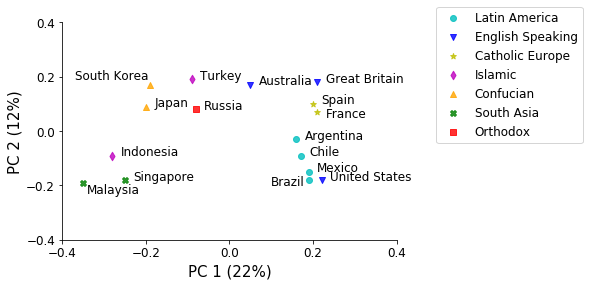

In [19]:
labels = foursquare_data.index.to_list()

for i, label in enumerate(labels):
    plt.scatter(foursquare_data.iloc[i,0], foursquare_data.iloc[i,1], 
                alpha=0.8, 
                marker=foursquare_data["marker"].iloc[i], 
                color=foursquare_data["color"].iloc[i], 
                label=foursquare_data["label"].iloc[i])

for i, label in enumerate(labels):      
    if label == "South Korea":
        plt.annotate(label, (foursquare_data.iloc[i,0]-0.18, foursquare_data.iloc[i,1]+0.02), fontsize=12)
        
    elif label == "Malaysia":
        plt.annotate(label, (foursquare_data.iloc[i,0]+0.01, foursquare_data.iloc[i,1]-0.04), fontsize=12)
    
    elif label == "Brazil":
        plt.annotate(label, (foursquare_data.iloc[i,0]-0.09, foursquare_data.iloc[i,1]-0.02), fontsize=12)
        
    elif label == "France":
        plt.annotate(label, (foursquare_data.iloc[i,0]+0.02, foursquare_data.iloc[i,1]-0.02), fontsize=12)
        
    else:
        plt.annotate(label, (foursquare_data.iloc[i,0]+0.02, foursquare_data.iloc[i,1]), fontsize=12)
        
        
hs, ls = plt.gca().get_legend_handles_labels()
by_label = dict(zip(ls, hs))
plt.legend(by_label.values(), by_label.keys(), fontsize=12, bbox_to_anchor=(1.1, 1.1), loc='upper left')

plt.xlabel("PC 1 (22%)")
plt.ylabel("PC 2 (12%)")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim((-0.4, 0.4))
plt.ylim(-0.4, 0.4)

plt.savefig("figs/pca-foursquare.eps", bbox_inches='tight', format="eps")

plt.show()